In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"




In [2]:
import pandas as pd
import missingno as ms
from pandas_profiling import ProfileReport
import numpy as np
import re
from sklearn import tree
import os
import datetime 







/Users/keweichen/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import EC_utilities.EC_Scoring.EC_JupyterNoteBook_Setting as IDE

from EC_utilities.EC_Scoring.EC_Base import *
from EC_utilities.EC_Scoring.EC_DataStep import *
from EC_utilities.EC_Scoring.EC_FeaturesSelection import *
from EC_utilities.EC_Scoring.EC_MachineLearning import *

from EC_utilities.scikitplot import *



from Eric_utilites.Eric_DataDrop import *
from Eric_utilites.Eric_DataProcessing import *



pd.set_option('Display.max_columns',None)
pd.set_option('Display.max_rows',200)

Datafolder = 'Data'
Inputfolder = 'Inputfolder'
hdf_name = 'Data_final.h5'


hdf_output_path = f_PathFileName(Datafolder,hdf_name)


filename = 'df_final0907.csv'

In [4]:
Data = pd.read_hdf('Data/Data_final.h5',key = 'start_data')


In [5]:
Data.head()

,,CASEBASE_CPCN1,CASEBASE_CPEN1,CASEBASE_BILLAR,CASEBASE_TAXNUM,CASEBASE_CEMPL,CASEBASE_EMPLNUM,CASEBASE_BUILDATE,CASEBASE_CCOMPTYPE,CASEBASE_CBUSKIND,CASEBASE_BUSTYPE,CASEBASE_RANK,CASEBASE_LEGAL,CASEBASE_OFFICEAR,CASEBASE_REGISTMONEY,CASEBASE_REGISTDIRECT,CASEBASE_OPENINGTIME,CASEBASE_CPJN1,CASEBASE_CCOUNTYOE,CASEBASE_CCAPCURR,CASEBASE_LICENSE,CASEBASE_NACE_ID,CASEBASE_NACE_CNAME,CASEBASE_SIC_ID,CASEBASE_SIC_CNAME,CASEBASE_DEFRANK,CASEBASE_CCOMPSTATE,CASEBASE_NPL_IND,CASEBASE_NPL,CASEBASE1_FACTORY,CASEBASE1_CONGLOME,CASEBASE1_HISTYPE,CASEBASE1_BFNAME,CASEBASE1_HISTORY,CASEBASE1_SALEITEM,CASEBASE1_CAPTIAL,CASEBASE1_COOPEIN,CASEBASE1_COOPEOUT,CASEBASE1_STOCKER,CASEBASE1_STOCKH,CASEBASE1_OPERATER,CASEBASE1_OPEOFFER,CASEBASE1_OPERATE,CASEBASE1_MPLANT,CASEBASE1_MPLOFFER,CASEBASE1_PROCPLANT,CASEBASE1_PAWN,CASEBASE1_PAWNNUM,CASEBASE1_RATEY1,CASEBASE1_RATEY2,CASEBASE1_RATEY3,CASEBASE1_GPY1,CASEBASE1_GPY2,CASEBASE1_OPENYEAR,CASEBASE1_SALEAMT,CASEBASE1_SALESTAT,CASEBASE1_STUFFIN,CASEBASE1_STLC,CASEBASE1_STDADAY,CASEBASE1_STDA,CASEBASE1_STDP,CASEBASE1_STUSDAY,CASEBASE1_STUS,CASEBASE1_STTT,CASEBASE1_STOADAY,CASEBASE1_STOA,CASEBASE1_COTHER,CASEBASE1_STOTHER,CASEBASE1_STOTHERTMP,CASEBASE1_STUFFOUT,CASEBASE1_CCOUNTY,CASEBASE1_ADDRNO,CASEBASE1_ADDRNONO,CASEBASE1_REGADDR,CASEBASE1_HISTORYLIST,CASEBASE1_SALEITEMM1,CASEBASE1_SALEITEMM2,CASEBASE1_CCAPTDOLL,CASEBASE1_OPEPRIZEOFFER,CASEBASE1_BOARD,CASEBASE1_CSALEDOLL,CASEBASE1_STOTHERDAY,CASEBASE1_CORGTYPE,CASEBASE1_CSTOCKSTATE,CASEBASE1_STOCKNO,CASEBASE1_ONEEXPLAIN,CASEBASE1_PAYDAY,CASEBASE1_CHISTORYCHANGE1,CASEBASE1_OPEOFFER_SEX,CASEBASE1_OPEOFFER1,CASEBASE1_OPEOFFER1_SEX,CASEBASE1_ISMERGER1,CASEBASE1_ISMERGER2,CASEBASE1_ISMERGER3,CASEBASE1_NETINAMT,CASEBASE1_STOCKPRICE_YM,CASEBASE2_STUFFIN2,CASEBASE2_PSLC,CASEBASE2_PSDADAY,CASEBASE2_PSDA,CASEBASE2_PSDP,CASEBASE2_PSUSDAY,CASEBASE2_PSUS,CASEBASE2_PSTT,CASEBASE2_PSOADAY,CASEBASE2_PSOA,CASEBASE2_COTHER,CASEBASE2_PSOTHER,CASEBASE2_PSOTHERTMP,CASEBASE2_STUFFOUT2,CASEBASE2_BANK,CASEBASE2_BILL1,CASEBASE2_BILL2,CASEBASE2_BILL3,CASEBASE2_BILLDATE,CASEBASE2_COMPBILL,CASEBASE2_PRESBILL,CASEBASE2_REFUND0,CASEBASE2_REFUND1,CASEBASE2_REFUND2,CASEBASE2_REFUND3,CASEBASE2_REFUND4,CASEBASE2_REFUND,CASEBASE2_REJECTREC,CASEBASE2_REJECT,CASEBASE2_REJECTNO,CASEBASE2_LAWSUITREC,CASEBASE2_LAWSUIT,CASEBASE2_PATENT,CASEBASE2_PANTENTNO,CASEBASE2_PLACE,CASEBASE2_PLACENAME,CASEBASE2_PLACELIST,CASEBASE2_PLACENUM,CASEBASE2_BUSNAME,CASEBASE2_BUSNAME2,CASEBASE2_EPLIST,CASEBASE2_INOUT,CASEBASE2_FINDATE2,CASEBASE2_FINDATE3,CASEBASE2_FINANCIAL,CASEBASE2_FINSTATE,CASEBASE2_TAXTYPE,CASEBASE2_TAXY1,CASEBASE2_TAXY2,CASEBASE2_TAXY3,CASEBASE2_CPATYPE,CASEBASE2_CPAY1,CASEBASE2_CPAY2,CASEBASE2_CPAY3,CASEBASE2_COMPTYPE,CASEBASE2_COMPY1,CASEBASE2_COMPY2,CASEBASE2_COMPY3,CASEBASE2_HISNEWS,CASEBASE2_NEWS,CASEBASE2_PRIZE,CASEBASE2_BASIS,CASEBASE2_PROPOSAL,CASEBASE2_CDOLLTYPE,CASEBASE2_RPTTYPE,CASEBASE2_CTRANDATE,CASEBASE2_PSOTHERDAY,CASEBASE2_PUBLIC1,CASEBASE2_MPUBLIC1,CASEBASE2_MPUBLIC,CASEBASE2_CCREDITPAY,CASEBASE2_CREDITPAYDAY,CASEBASE2_PAYHISTORY,CASEBASE2_PAYHISTORY2,CASEBASE2_NOFINRPT,CASEBASE2_FINSTATENAME,CASEBASE2_MAXCREDIT,CASEBASE2_CMAXCURRENCY,CASEBASE2_MAXMONEY,CASEBASE2_PROCREDIT,CASEBASE2_ASSET,CASEBASE2_AFTERTAX,CASEBASE2_FUNDDAY,CASEBASE2_SALEDAY,CASEBASE2_CDOLLTYPE1,CASEBASE2_CFINSTATE1,CASEBASE2_CFINSTATE2,CASEBASE2_CFINSTATE3,CASEBASE2_AQUICK1,CASEBASE2_LQUICK1,CASEBASE2_LKEEP1,CASEBASE2_AQUICK2,CASEBASE2_LQUICK2,CASEBASE2_LKEEP2,CASEBASE2_AQUICK3,CASEBASE2_LQUICK3,CASEBASE2_LKEEP3,CASEBASE2_NGETMSTOCK,CASEBASE2_STOCK1,CASEBASE2_STOCK2,CASEBASE2_STOCK3,CASEBASE2_SHOWTYPE,CASEBASE2_FINDATEM1,CASEBASE2_FINDATEM2,CASEBASE2_FINDATEM3,CASEBASE2_FINANCIALM,CASEBASE2_AQUICKM1,CASEBASE2_LQUICKM1,CASEBASE2_LKEEPM1,CASEBASE2_AQUICKM2,CASEBASE2_LQUICKM2,CASEBASE2_LKEEPM2,CASEBASE2_AQUICKM3,CASEBASE2_LQUICKM3,CASEBASE2_LKEEPM3,CASEBASE2_STOCKM1,CASEBASE2_STOCKM2,CASEBASE2_STOCKM3,CASEBASE2_TAXTYPEM,CASEBASE2_TAXYM1,CASEBASE2_TAXYM2,CASEBASE2_TAXYM3,CASEBASE2_CPATYPEM,CASEBASE2_CPAYM1,

In [6]:
Data.shape

(127747, 551)

In [7]:
## 抓取 Columns 分類

path = f_PathFileName(Inputfolder,'Data_final_col_summary.xlsx')

col_type = pd.read_excel(path,usecols=[0,1])

col_object = col_type.loc[col_type.iloc[:,1]=='cat']['ColumnsName'].to_list()
col_numeric = col_type.loc[col_type.iloc[:,1]=='num']['ColumnsName'].to_list()

# 模型納入之欄位

In [8]:
y_col = ['Y_OPERATE1','CASEBASE1_GPY1']

Data_Y = Data[y_col]
Data_X = Data.drop(columns = y_col)

In [9]:
# ## 只將「中文」形式挑選出來 

# col = Data_X.columns
# col_suffix_unique = (col.str.extract(r'(.*)(_[EC])(.*)')[0] + '_[EC]?' + col.str.extract(r'(.*)(_[EC])(.*)')[2]).dropna().unique()
# drop_CE = []
# keep_CE = []
# for i in col_suffix_unique:
    
#     bool_contain = col.str.contains(r'^'+i+'$')
#     n_contain = bool_contain.sum()
    
#     if n_contain > 1:
#         if i.replace('_[EC]?','_C') in col:
#             str_find = i.replace('_[EC]?','_C')
#             col_temp = col[bool_contain]
#             col_drop = col_temp[col_temp.str.find(str_find) != 0].to_list()

#         elif i.replace('_[EC]?','_') in col:
#             str_find = i.replace('_[EC]?','_')
#             col_temp = col[bool_contain]
#             col_drop = col_temp[col_temp.str.find(str_find) != 0].to_list()

#         else:
#             print('no {} and {} columnames'.format(i.replace('_[EC]?','_C'),i.replace('_[EC]?','_')))

#         keep_CE.append(str_find)
#         drop_CE = drop_CE + col_drop
    
# print('有相同意義不同語言種類共有：{}'.format(len(keep_CE)))
# print('此步驟共刪除了 {} 個欄位'.format(len(drop_CE)))




In [10]:
## 不納入 後來評分的欄位之 相關變數：包含 SCORE & RISK

Card_limit = 500
missing_ratio = 0.1
zero_ratio = 0.9
Corr = 0.95
keep = ['CASEBASE5_TOPNOWCAP','CASEBASE5_TOPNOWNETWRT','CASEBASE5_TOPYEAR','CASEBASE5_TOPMAXBUSSORT','CASEBASE5_TOPNOWBUSSORT','CASEFINANCIAL_1_FINDATE1']
drop_set = ['CASEBASE5_TOPNOWSALE','CASEBASE5_TOPBUSID','CASEBASE5_FINANCEBUSID']

condi = {Card_limit: lambda x : f_DropHighCard(Data_X,x,keep = keep),  # 刪除型態為 Object ，unique 數目較多的欄位
         #Corr: lambda x : f_DropHighCorr(Data_X,x,keep = keep),
         1: lambda x : f_DropIdentity(Data_X,x,keep = keep),
         zero_ratio : lambda x : f_DropZero(Data_X,x,keep = keep),     # 刪除 zero 比例高於9成資料
         missing_ratio: lambda x : f_DropNa2(Data_X,x,keep = keep)}    # 刪除 Missing value 比例高於 0.1 的資料

In [11]:
## 把抓出有 Score 的欄位
ColDropTable, drop= f_DropColPipe(condi, regex = True)
ColDropTable
#drop_score



需刪除欄位共:383


,Symbol,ColumnName,Total,符合該條件數目,"符合該條件,需保留的",最終刪數目,刪除百分比
0,DropHighCard 500,"[CASEBASE_CPCN1, CASEBASE_CPEN1, CASEBASE_BILL...",549,79,0,79,0.143898
1,Drop Identity,"[CASEBASE_CCAPCURR, CASEBASE1_CCAPTDOLL, CASEB...",549,15,0,15,0.027322
2,DropZero 0.9,"[CASEBASE_OPENINGTIME, CASEBASE1_COOPEIN, CASE...",549,32,0,32,0.058288
3,DropNA 0.1,"[CASEBASE_CEMPL, CASEBASE_CPJN1, CASEBASE_LICE...",549,332,0,332,0.604736


In [12]:
## 首先，先將「重複意義欄位」以及缺值大於 0.1 的欄位做刪除。

drop_temp =  ColDropTable.loc[:,:]['ColumnName'].sum()
Data2 = Data.drop(columns = drop_temp)
Data2.shape

(127747, 168)

In [13]:
corr_matrix = Data2.corr()


<Figure size 360x360 with 0 Axes>

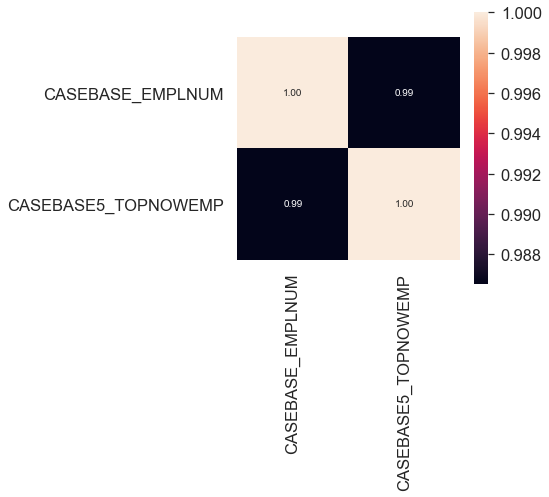

<Figure size 360x360 with 0 Axes>

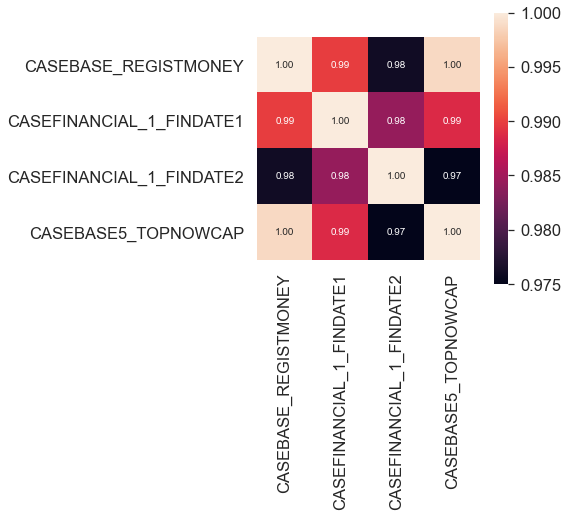

<Figure size 360x360 with 0 Axes>

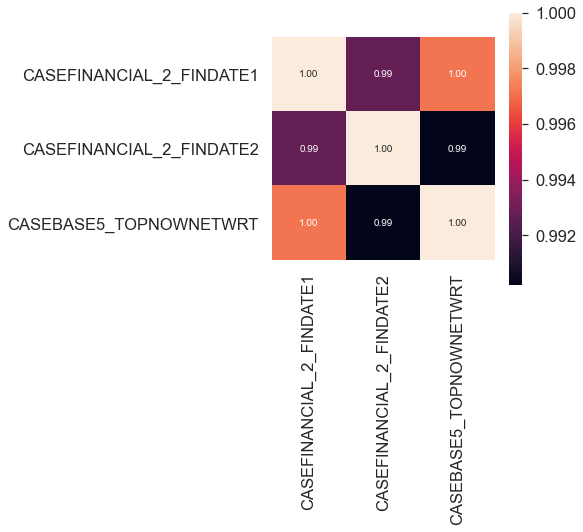

<Figure size 360x360 with 0 Axes>

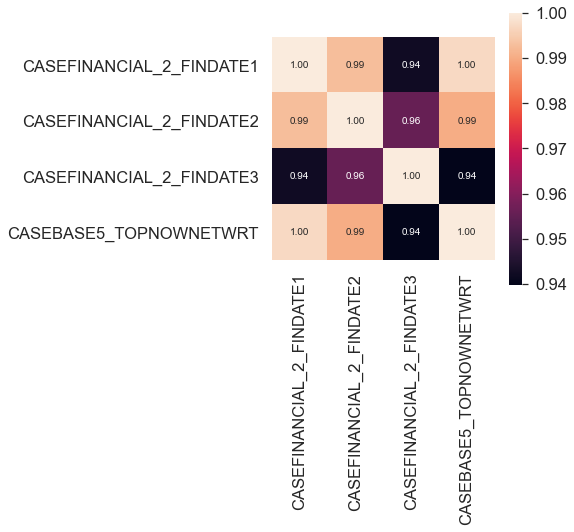

<Figure size 360x360 with 0 Axes>

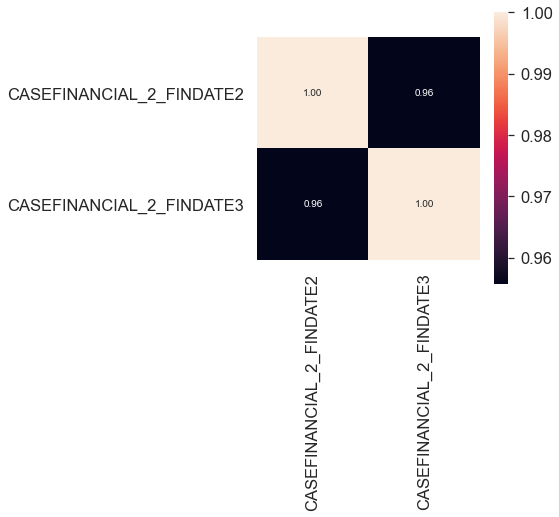

<Figure size 360x360 with 0 Axes>

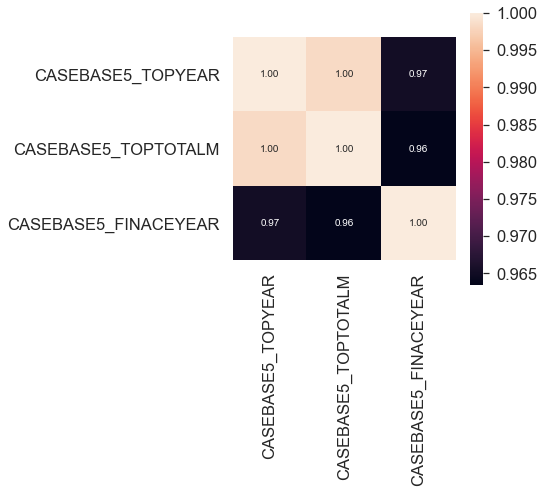

<Figure size 360x360 with 0 Axes>

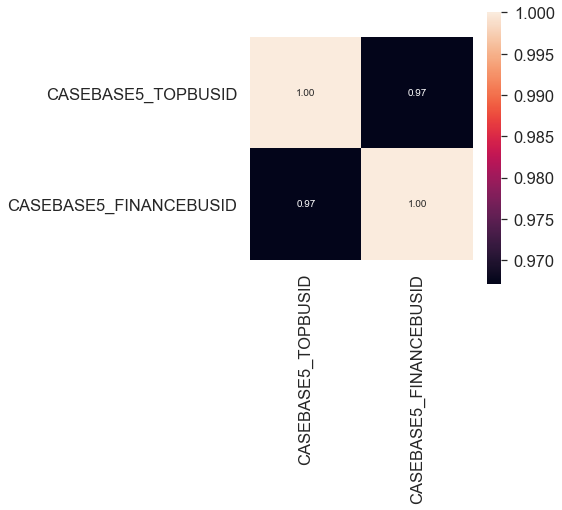

<Figure size 360x360 with 0 Axes>

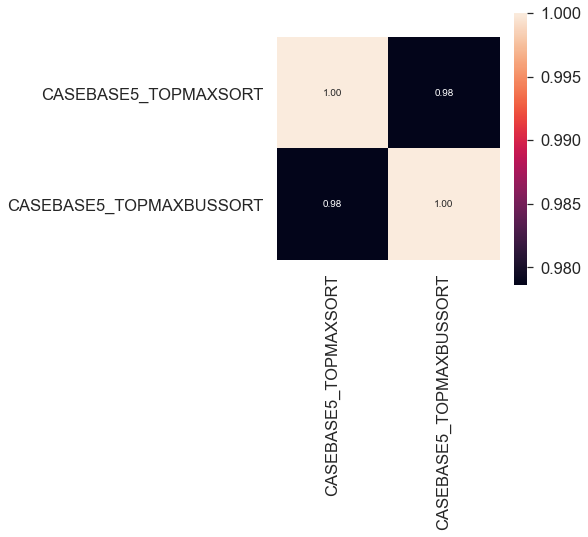

<Figure size 360x360 with 0 Axes>

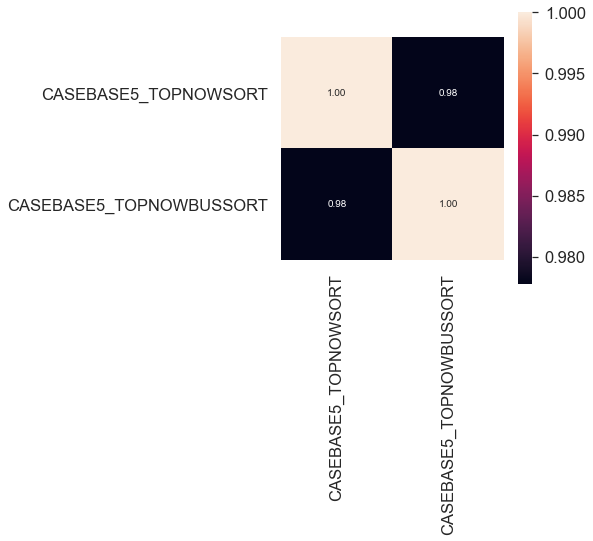

<Figure size 360x360 with 0 Axes>

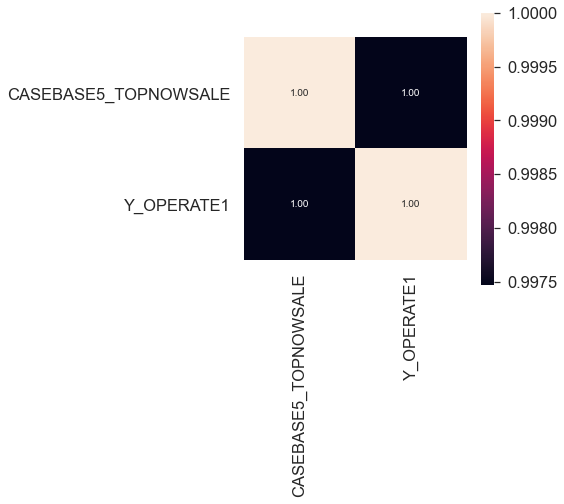

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
combine = set()
for i in corr_matrix.columns:
    temp_col = corr_matrix[corr_matrix[i]>Corr].index.to_list()
    if len(temp_col) <= 1 or (tuple(temp_col) in combine):
        continue
    else:
        
        cm = corr_matrix.loc[temp_col,temp_col].values
        plt.figure(figsize = (5,5))
        sns.set(font_scale=1.5)
        hm = sns.heatmap(cm,
                         cbar=True,
                         annot=True,
                         square=True,
                         fmt='.2f',
                         annot_kws={'size': 10},
                         yticklabels=temp_col,
                         xticklabels=temp_col)
        plt.show() 
        combine = combine | {tuple(temp_col)}

In [15]:
ColDropTable_corr, drop_corr= f_DropColPipe({Corr: lambda x : f_DropHighCorr(Data2,x,keep = y_col + keep)}, regex = True)
ColDropTable_corr
drop_corr



需刪除欄位共:12


,Symbol,ColumnName,Total,符合該條件數目,"符合該條件,需保留的",最終刪數目,刪除百分比
0,Corr > 0.95,"[CASEBASE_REGISTMONEY, CASEFINANCIAL_2_FINDATE...",168,13,1,12,0.071429


['CASEBASE_REGISTMONEY',
 'CASEFINANCIAL_2_FINDATE1',
 'CASEFINANCIAL_1_FINDATE2',
 'CASEFINANCIAL_2_FINDATE2',
 'CASEFINANCIAL_2_FINDATE3',
 'CASEBASE5_TOPTOTALM',
 'CASEBASE5_TOPMAXSORT',
 'CASEBASE5_TOPNOWSORT',
 'CASEBASE5_TOPNOWEMP',
 'CASEBASE5_TOPNOWSALE',
 'CASEBASE5_FINACEYEAR',
 'CASEBASE5_FINANCEBUSID']

In [16]:
fin_drop = Data.columns[Data.columns.str.contains(r'FINDATE|[^(GP)]Y1|CASEBASE5_TOPNOW|CASEBASE5_NOW|_CHF')].to_list()
fin_drop

['CASEBASE1_RATEY1',
 'CASEBASE2_FINDATE2',
 'CASEBASE2_FINDATE3',
 'CASEBASE2_TAXY1',
 'CASEBASE2_CPAY1',
 'CASEBASE2_FINDATEM1',
 'CASEBASE2_FINDATEM2',
 'CASEBASE2_FINDATEM3',
 'CASEBASE3_CHFOLW1',
 'CASEBASE3_CHFOLW1AMT',
 'CASEBASE3_CHFOLW2',
 'CASEBASE3_CHFOLWM1',
 'CASEBASE3_CHFOLWM1AMT',
 'CASEBASE3_CHFOLWM2',
 'CASEFINANCIAL_1_FINDATE1',
 'CASEFINANCIAL_2_FINDATE1',
 'CASEFINANCIAL_3_FINDATE1',
 'CASEFINANCIAL_4_FINDATE1',
 'CASEFINANCIAL_5_FINDATE1',
 'CASEFINANCIAL_6_FINDATE1',
 'CASEFINANCIAL_7_FINDATE1',
 'CASEFINANCIAL_8_FINDATE1',
 'CASEFINANCIAL_10_FINDATE1',
 'CASEFINANCIAL_11_FINDATE1',
 'CASEFINANCIAL_12_FINDATE1',
 'CASEFINANCIAL_13_FINDATE1',
 'CASEFINANCIAL_14_FINDATE1',
 'CASEFINANCIAL_15_FINDATE1',
 'CASEFINANCIAL_16_FINDATE1',
 'CASEFINANCIAL_1_FINDATE2',
 'CASEFINANCIAL_2_FINDATE2',
 'CASEFINANCIAL_3_FINDATE2',
 'CASEFINANCIAL_4_FINDATE2',
 'CASEFINANCIAL_5_FINDATE2',
 'CASEFINANCIAL_6_FINDATE2',
 'CASEFINANCIAL_7_FINDATE2',
 'CASEFINANCIAL_8_FINDATE2',
 'CASE

# 納入模型

In [17]:
Data2 = Data.drop(columns = drop_set + drop + drop_corr + fin_drop)
Data2.shape

(127747, 137)

In [18]:
Data2.head()

,,CASEBASE_EMPLNUM,CASEBASE_BUILDATE,CASEBASE_CCOMPTYPE,CASEBASE_CBUSKIND,CASEBASE_RANK,CASEBASE_LEGAL,CASEBASE_CCOUNTYOE,CASEBASE1_FACTORY,CASEBASE1_CONGLOME,CASEBASE1_HISTYPE,CASEBASE1_HISTORY,CASEBASE1_SALEITEM,CASEBASE1_CAPTIAL,CASEBASE1_STOCKER,CASEBASE1_STOCKH,CASEBASE1_OPERATE,CASEBASE1_MPLANT,CASEBASE1_PROCPLANT,CASEBASE1_PAWN,CASEBASE1_RATEY2,CASEBASE1_RATEY3,CASEBASE1_GPY1,CASEBASE1_GPY2,CASEBASE1_OPENYEAR,CASEBASE1_SALESTAT,CASEBASE1_STUFFIN,CASEBASE1_STLC,CASEBASE1_STTT,CASEBASE1_STOTHER,CASEBASE1_STUFFOUT,CASEBASE1_CORGTYPE,CASEBASE1_ONEEXPLAIN,CASEBASE1_OPEOFFER_SEX,CASEBASE2_STUFFIN2,CASEBASE2_PSLC,CASEBASE2_PSTT,CASEBASE2_PSOTHER,CASEBASE2_STUFFOUT2,CASEBASE2_BANK,CASEBASE2_BILL1,CASEBASE2_BILL2,CASEBASE2_BILL3,CASEBASE2_PRESBILL,CASEBASE2_REFUND0,CASEBASE2_REFUND1,CASEBASE2_REFUND2,CASEBASE2_REFUND3,CASEBASE2_REFUND4,CASEBASE2_LAWSUITREC,CASEBASE2_LAWSUIT,CASEBASE2_PATENT,CASEBASE2_PANTENTNO,CASEBASE2_PLACELIST,CASEBASE2_PLACENUM,CASEBASE2_EPLIST,CASEBASE2_INOUT,CASEBASE2_FINANCIAL,CASEBASE2_FINSTATE,CASEBASE2_TAXTYPE,CASEBASE2_CPATYPE,CASEBASE2_COMPTYPE,CASEBASE2_NEWS,CASEBASE2_BASIS,CASEBASE2_PROPOSAL,CASEBASE2_RPTTYPE,CASEBASE2_NOFINRPT,CASEBASE2_MAXCREDIT,CASEBASE2_PROCREDIT,CASEBASE2_NGETMSTOCK,CASEBASE3_FINCHK,CASEBASE3_NLIQUTRAN,CASEBASE3_OPERTRAN,CASEBASE3_ANAYYEAR,CASEBASE3_LIQUVER,CASEBASE3_CASHVER,CASEINOUT_3_INOUT1,LAND_AREA_SUM,BUILD_AREA_SUM,CASEBASE5_TOPYEAR,CASEBASE5_TOPBUSNAME,CASEBASE5_ATTRIBUTE,CASEBASE5_ATTRIBNAME,CASEBASE5_TOPBUSSUMM,CASEBASE5_TOPBUSSUM,CASEBASE5_COMPBUSNO,CASEBASE5_TOPAVGEMP,CASEBASE5_TOPAVGSALE,CASEBASE5_TOPMINSORT,CASEBASE5_TOPMAXBUSSORT,CASEBASE5_TOPMINBUSSORT,CASEBASE5_TOPMAXEMP,CASEBASE5_TOPMINEMP,CASEBASE5_TOPMAXSALE,CASEBASE5_TOPMINSALE,CASEBASE5_TOPMAXCAP,CASEBASE5_TOPMINCAP,CASEBASE5_FINACETYPE,CASEBASE5_FINANCEBUSNAME,CASEBASE5_MED02,CASEBASE5_MED06,CASEBASE5_MED09,CASEBASE5_MED10,CASEBASE5_MED23,CASEBASE5_MED24,CASEBASE5_MED25,CASEBASE5_MED26,CASEBASE5_MED41,CASEBASE5_MED42,CASEBASE5_MED43,CASEBASE5_MED45,CASEBASE5_MED50,CASEBASE5_MED51,CASEBASE5_MED61,CASEBASE5_MED62,CASEBASE5_MED64,CASEBASE5_MED65,CASEBASE5_MED67,CASEBASE5_MED71,CASEBASE5_MED72,CASEBASE5_MED22,CASEBASE5_MED21,CASEBASE5_MED44,CASEBASE5_REC_NO,CASEBASE5_MEMPLID,CASEBASE5_TOPAVGCAP,CASEBASE5_TOPMAXASST,CASEBASE5_TOPMINASST,CASEBASE5_TOPAVGASST,CASEBASE5_TOPMAXNETWRT,CASEBASE5_TOPMINNETWRT,CASEBASE5_TOPAVGNETWRT,Flag_has_emplnum,Y_OPERATE1,Flag_CEMPL,CASE_Y,CASE_M,CASEBASE_BUSTYPE_4
CASE_ID,CASEBASE_CP_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0801110001,C0460780,101,24.0,大型企業,製造業,B,1.0,桃園縣,2.0,5.0,1.0,1.0,2.0,9.0,0.0,10.0,1.0,1.0,0.0,1.0,100.0,100.0,14.86,11.30,2.0,3.0,7.0,0.0,0.0,100.0,1.0,股票上櫃,1.0,0.0,0.0,0.0,0.0,100.0,1.0,0.0,N,Y,Y,1.0,Y,N,N,N,Y,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,8.0,0.0,N,Y,N,0.0,9.0,Z,2.0,N,N,N,0.0,Y,0.0,0.55,2006.0,1.0,1.0,1.0,5773.00,6073.00,2008.0,被動電子元件業,M,製造業,2746.0,63.0,37.0,288.0,2041684.0,4921.0,156.0,2703.0,2586.0,15.0,13165645.0,125298.0,24382213.0,50000.0,1.0,其他電子零組件業,12.39,35.57,535.19,55.14,6.48,10.61,6.72,18.54,9.32,3.42,6.21,0.86,5.36,68.0,186.26,146.38,37.22,108.44,14.02,12.77,4.94,0.0,0.0,0.0,160.0,546.0,1236431.0,49603313.0,109807.0,3206501.0,31946432.0,41045.0,2167368.0,1,805638.0,1,8,1,1299
0801110002,C0180073,50,23.0,中型企業,製造業,B,1.0,台中市,2.0,0.0,1.0,1.0,1.0,9.0,0.0,10.0,2.0,1.0,3.0,0.0,100.0,100.0,-32.18,-78.71,2.0,3.0,1.0,100.0,0.0,0.0,2.0,興櫃股票,0.0,0.0,2.0,100.0,0.0,0.0,2.0,2.0,N,N,N,0.0,NaN,NaN,NaN,NaN,Y,1.0,1.0,1.0,4.0,0.0,0.0,5.0,2.0,8.0,0.0,N,Y,N,0.0,9.0,Z,2.0,N,N,N,0.0,Y,0.0,0.17,2006.0,1.0,1.0,0.5,2446.64,1898.54,2007.0,電池業,M,製造業,2709.0,17.0,0.0,295.0,3510459.0,4326.0,116.0,2464.0,905.0,50.0,16310066.0,220540.0,2036188.0,54000.0,1.0,電池業,17.99,41.06,400.88,0.00,5.34,11.99,6.03,37.86,6.10,4.55,5.87,0.83,6.36,58.0,179.61,123.03,60.55,81.42,15.60,5.49,0.13,0.0,0.0,0.0,10.0,982.0,801170.0,9136650.0,331062.0,3928758.0,5603209.0,169327.0,1904907.0,1,31993.0,1,8,

<AxesSubplot:>

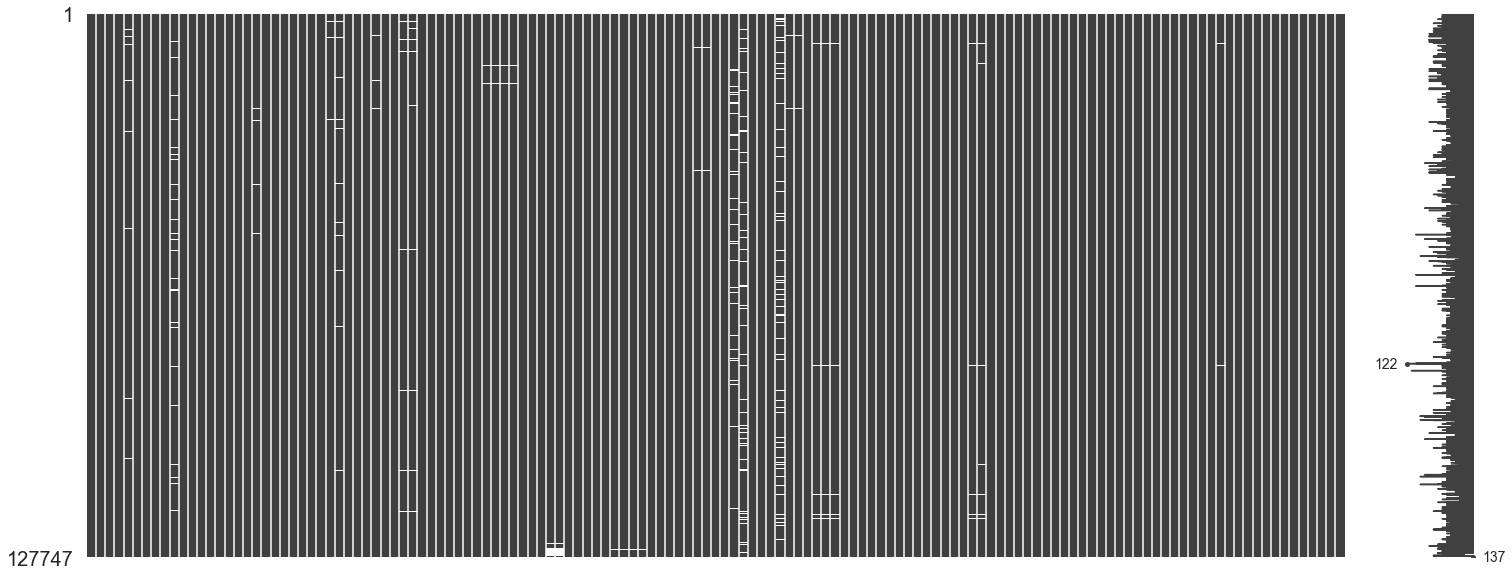

In [19]:
ms.matrix(Data2)

In [20]:
Data2.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 127747 entries, ('0801110001', 'C0460780') to ('1905990029', 'C941005F')
Data columns (total 137 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   CASEBASE_EMPLNUM          int64  
 1   CASEBASE_BUILDATE         float64
 2   CASEBASE_CCOMPTYPE        object 
 3   CASEBASE_CBUSKIND         object 
 4   CASEBASE_RANK             object 
 5   CASEBASE_LEGAL            float64
 6   CASEBASE_CCOUNTYOE        object 
 7   CASEBASE1_FACTORY         float64
 8   CASEBASE1_CONGLOME        float64
 9   CASEBASE1_HISTYPE         float64
 10  CASEBASE1_HISTORY         float64
 11  CASEBASE1_SALEITEM        float64
 12  CASEBASE1_CAPTIAL         float64
 13  CASEBASE1_STOCKER         float64
 14  CASEBASE1_STOCKH          float64
 15  CASEBASE1_OPERATE         float64
 16  CASEBASE1_MPLANT          float64
 17  CASEBASE1_PROCPLANT       float64
 18  CASEBASE1_PAWN            float64
 19  CASEBASE1_RATEY2   

In [23]:

Data2.head()

,,CASEBASE_EMPLNUM,CASEBASE_BUILDATE,CASEBASE_CCOMPTYPE,CASEBASE_CBUSKIND,CASEBASE_RANK,CASEBASE_LEGAL,CASEBASE_CCOUNTYOE,CASEBASE1_FACTORY,CASEBASE1_CONGLOME,CASEBASE1_HISTYPE,CASEBASE1_HISTORY,CASEBASE1_SALEITEM,CASEBASE1_CAPTIAL,CASEBASE1_STOCKER,CASEBASE1_STOCKH,CASEBASE1_OPERATE,CASEBASE1_MPLANT,CASEBASE1_PROCPLANT,CASEBASE1_PAWN,CASEBASE1_RATEY2,CASEBASE1_RATEY3,CASEBASE1_GPY1,CASEBASE1_GPY2,CASEBASE1_OPENYEAR,CASEBASE1_SALESTAT,CASEBASE1_STUFFIN,CASEBASE1_STLC,CASEBASE1_STTT,CASEBASE1_STOTHER,CASEBASE1_STUFFOUT,CASEBASE1_CORGTYPE,CASEBASE1_ONEEXPLAIN,CASEBASE1_OPEOFFER_SEX,CASEBASE2_STUFFIN2,CASEBASE2_PSLC,CASEBASE2_PSTT,CASEBASE2_PSOTHER,CASEBASE2_STUFFOUT2,CASEBASE2_BANK,CASEBASE2_BILL1,CASEBASE2_BILL2,CASEBASE2_BILL3,CASEBASE2_PRESBILL,CASEBASE2_REFUND0,CASEBASE2_REFUND1,CASEBASE2_REFUND2,CASEBASE2_REFUND3,CASEBASE2_REFUND4,CASEBASE2_LAWSUITREC,CASEBASE2_LAWSUIT,CASEBASE2_PATENT,CASEBASE2_PANTENTNO,CASEBASE2_PLACELIST,CASEBASE2_PLACENUM,CASEBASE2_EPLIST,CASEBASE2_INOUT,CASEBASE2_FINANCIAL,CASEBASE2_FINSTATE,CASEBASE2_TAXTYPE,CASEBASE2_CPATYPE,CASEBASE2_COMPTYPE,CASEBASE2_NEWS,CASEBASE2_BASIS,CASEBASE2_PROPOSAL,CASEBASE2_RPTTYPE,CASEBASE2_NOFINRPT,CASEBASE2_MAXCREDIT,CASEBASE2_PROCREDIT,CASEBASE2_NGETMSTOCK,CASEBASE3_FINCHK,CASEBASE3_NLIQUTRAN,CASEBASE3_OPERTRAN,CASEBASE3_ANAYYEAR,CASEBASE3_LIQUVER,CASEBASE3_CASHVER,CASEINOUT_3_INOUT1,LAND_AREA_SUM,BUILD_AREA_SUM,CASEBASE5_TOPYEAR,CASEBASE5_TOPBUSNAME,CASEBASE5_ATTRIBUTE,CASEBASE5_ATTRIBNAME,CASEBASE5_TOPBUSSUMM,CASEBASE5_TOPBUSSUM,CASEBASE5_COMPBUSNO,CASEBASE5_TOPAVGEMP,CASEBASE5_TOPAVGSALE,CASEBASE5_TOPMINSORT,CASEBASE5_TOPMAXBUSSORT,CASEBASE5_TOPMINBUSSORT,CASEBASE5_TOPMAXEMP,CASEBASE5_TOPMINEMP,CASEBASE5_TOPMAXSALE,CASEBASE5_TOPMINSALE,CASEBASE5_TOPMAXCAP,CASEBASE5_TOPMINCAP,CASEBASE5_FINACETYPE,CASEBASE5_FINANCEBUSNAME,CASEBASE5_MED02,CASEBASE5_MED06,CASEBASE5_MED09,CASEBASE5_MED10,CASEBASE5_MED23,CASEBASE5_MED24,CASEBASE5_MED25,CASEBASE5_MED26,CASEBASE5_MED41,CASEBASE5_MED42,CASEBASE5_MED43,CASEBASE5_MED45,CASEBASE5_MED50,CASEBASE5_MED51,CASEBASE5_MED61,CASEBASE5_MED62,CASEBASE5_MED64,CASEBASE5_MED65,CASEBASE5_MED67,CASEBASE5_MED71,CASEBASE5_MED72,CASEBASE5_MED22,CASEBASE5_MED21,CASEBASE5_MED44,CASEBASE5_REC_NO,CASEBASE5_MEMPLID,CASEBASE5_TOPAVGCAP,CASEBASE5_TOPMAXASST,CASEBASE5_TOPMINASST,CASEBASE5_TOPAVGASST,CASEBASE5_TOPMAXNETWRT,CASEBASE5_TOPMINNETWRT,CASEBASE5_TOPAVGNETWRT,Flag_has_emplnum,Y_OPERATE1,Flag_CEMPL,CASE_Y,CASE_M,CASEBASE_BUSTYPE_4
CASE_ID,CASEBASE_CP_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0801110001,C0460780,101,24.0,大型企業,製造業,B,1.0,桃園縣,2.0,5.0,1.0,1.0,2.0,9.0,0.0,10.0,1.0,1.0,0.0,1.0,100.0,100.0,14.86,11.30,2.0,3.0,7.0,0.0,0.0,100.0,1.0,股票上櫃,1.0,0.0,0.0,0.0,0.0,100.0,1.0,0.0,N,Y,Y,1.0,Y,N,N,N,Y,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,8.0,0.0,N,Y,N,0.0,9.0,Z,2.0,N,N,N,0.0,Y,0.0,0.55,2006.0,1.0,1.0,1.0,5773.00,6073.00,2008.0,被動電子元件業,M,製造業,2746.0,63.0,37.0,288.0,2041684.0,4921.0,156.0,2703.0,2586.0,15.0,13165645.0,125298.0,24382213.0,50000.0,1.0,其他電子零組件業,12.39,35.57,535.19,55.14,6.48,10.61,6.72,18.54,9.32,3.42,6.21,0.86,5.36,68.0,186.26,146.38,37.22,108.44,14.02,12.77,4.94,0.0,0.0,0.0,160.0,546.0,1236431.0,49603313.0,109807.0,3206501.0,31946432.0,41045.0,2167368.0,1,805638.0,1,8,1,1299
0801110002,C0180073,50,23.0,中型企業,製造業,B,1.0,台中市,2.0,0.0,1.0,1.0,1.0,9.0,0.0,10.0,2.0,1.0,3.0,0.0,100.0,100.0,-32.18,-78.71,2.0,3.0,1.0,100.0,0.0,0.0,2.0,興櫃股票,0.0,0.0,2.0,100.0,0.0,0.0,2.0,2.0,N,N,N,0.0,NaN,NaN,NaN,NaN,Y,1.0,1.0,1.0,4.0,0.0,0.0,5.0,2.0,8.0,0.0,N,Y,N,0.0,9.0,Z,2.0,N,N,N,0.0,Y,0.0,0.17,2006.0,1.0,1.0,0.5,2446.64,1898.54,2007.0,電池業,M,製造業,2709.0,17.0,0.0,295.0,3510459.0,4326.0,116.0,2464.0,905.0,50.0,16310066.0,220540.0,2036188.0,54000.0,1.0,電池業,17.99,41.06,400.88,0.00,5.34,11.99,6.03,37.86,6.10,4.55,5.87,0.83,6.36,58.0,179.61,123.03,60.55,81.42,15.60,5.49,0.13,0.0,0.0,0.0,10.0,982.0,801170.0,9136650.0,331062.0,3928758.0,5603209.0,169327.0,1904907.0,1,31993.0,1,8,

In [22]:
Data2.to_hdf('Data/Data_final.h5',key='no_fin',format='t')
#col_mapping.to_hdf('Outputfolder/Data.h5',key='mapping')

# 特徵選取

In [24]:
Data_final = Data2.dropna(axis = 0, how='any')
#Data_final = Data2

Data_final.head()
Data_final.shape

,,CASEBASE_EMPLNUM,CASEBASE_BUILDATE,CASEBASE_CCOMPTYPE,CASEBASE_CBUSKIND,CASEBASE_RANK,CASEBASE_LEGAL,CASEBASE_CCOUNTYOE,CASEBASE1_FACTORY,CASEBASE1_CONGLOME,CASEBASE1_HISTYPE,CASEBASE1_HISTORY,CASEBASE1_SALEITEM,CASEBASE1_CAPTIAL,CASEBASE1_STOCKER,CASEBASE1_STOCKH,CASEBASE1_OPERATE,CASEBASE1_MPLANT,CASEBASE1_PROCPLANT,CASEBASE1_PAWN,CASEBASE1_RATEY2,CASEBASE1_RATEY3,CASEBASE1_GPY1,CASEBASE1_GPY2,CASEBASE1_OPENYEAR,CASEBASE1_SALESTAT,CASEBASE1_STUFFIN,CASEBASE1_STLC,CASEBASE1_STTT,CASEBASE1_STOTHER,CASEBASE1_STUFFOUT,CASEBASE1_CORGTYPE,CASEBASE1_ONEEXPLAIN,CASEBASE1_OPEOFFER_SEX,CASEBASE2_STUFFIN2,CASEBASE2_PSLC,CASEBASE2_PSTT,CASEBASE2_PSOTHER,CASEBASE2_STUFFOUT2,CASEBASE2_BANK,CASEBASE2_BILL1,CASEBASE2_BILL2,CASEBASE2_BILL3,CASEBASE2_PRESBILL,CASEBASE2_REFUND0,CASEBASE2_REFUND1,CASEBASE2_REFUND2,CASEBASE2_REFUND3,CASEBASE2_REFUND4,CASEBASE2_LAWSUITREC,CASEBASE2_LAWSUIT,CASEBASE2_PATENT,CASEBASE2_PANTENTNO,CASEBASE2_PLACELIST,CASEBASE2_PLACENUM,CASEBASE2_EPLIST,CASEBASE2_INOUT,CASEBASE2_FINANCIAL,CASEBASE2_FINSTATE,CASEBASE2_TAXTYPE,CASEBASE2_CPATYPE,CASEBASE2_COMPTYPE,CASEBASE2_NEWS,CASEBASE2_BASIS,CASEBASE2_PROPOSAL,CASEBASE2_RPTTYPE,CASEBASE2_NOFINRPT,CASEBASE2_MAXCREDIT,CASEBASE2_PROCREDIT,CASEBASE2_NGETMSTOCK,CASEBASE3_FINCHK,CASEBASE3_NLIQUTRAN,CASEBASE3_OPERTRAN,CASEBASE3_ANAYYEAR,CASEBASE3_LIQUVER,CASEBASE3_CASHVER,CASEINOUT_3_INOUT1,LAND_AREA_SUM,BUILD_AREA_SUM,CASEBASE5_TOPYEAR,CASEBASE5_TOPBUSNAME,CASEBASE5_ATTRIBUTE,CASEBASE5_ATTRIBNAME,CASEBASE5_TOPBUSSUMM,CASEBASE5_TOPBUSSUM,CASEBASE5_COMPBUSNO,CASEBASE5_TOPAVGEMP,CASEBASE5_TOPAVGSALE,CASEBASE5_TOPMINSORT,CASEBASE5_TOPMAXBUSSORT,CASEBASE5_TOPMINBUSSORT,CASEBASE5_TOPMAXEMP,CASEBASE5_TOPMINEMP,CASEBASE5_TOPMAXSALE,CASEBASE5_TOPMINSALE,CASEBASE5_TOPMAXCAP,CASEBASE5_TOPMINCAP,CASEBASE5_FINACETYPE,CASEBASE5_FINANCEBUSNAME,CASEBASE5_MED02,CASEBASE5_MED06,CASEBASE5_MED09,CASEBASE5_MED10,CASEBASE5_MED23,CASEBASE5_MED24,CASEBASE5_MED25,CASEBASE5_MED26,CASEBASE5_MED41,CASEBASE5_MED42,CASEBASE5_MED43,CASEBASE5_MED45,CASEBASE5_MED50,CASEBASE5_MED51,CASEBASE5_MED61,CASEBASE5_MED62,CASEBASE5_MED64,CASEBASE5_MED65,CASEBASE5_MED67,CASEBASE5_MED71,CASEBASE5_MED72,CASEBASE5_MED22,CASEBASE5_MED21,CASEBASE5_MED44,CASEBASE5_REC_NO,CASEBASE5_MEMPLID,CASEBASE5_TOPAVGCAP,CASEBASE5_TOPMAXASST,CASEBASE5_TOPMINASST,CASEBASE5_TOPAVGASST,CASEBASE5_TOPMAXNETWRT,CASEBASE5_TOPMINNETWRT,CASEBASE5_TOPAVGNETWRT,Flag_has_emplnum,Y_OPERATE1,Flag_CEMPL,CASE_Y,CASE_M,CASEBASE_BUSTYPE_4
CASE_ID,CASEBASE_CP_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0801110001,C0460780,101,24.0,大型企業,製造業,B,1.0,桃園縣,2.0,5.0,1.0,1.0,2.0,9.0,0.0,10.0,1.0,1.0,0.0,1.0,100.0,100.0,14.86,11.30,2.0,3.0,7.0,0.0,0.0,100.0,1.0,股票上櫃,1.0,0.0,0.0,0.0,0.0,100.0,1.0,0.0,N,Y,Y,1.0,Y,N,N,N,Y,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,8.0,0.0,N,Y,N,0.0,9.0,Z,2.0,N,N,N,0.0,Y,0.00,0.55,2006.0,1.0,1.0,1.00,5773.0,6073.00,2008.0,被動電子元件業,M,製造業,2746.0,63.0,37.0,288.0,2041684.0,4921.0,156.0,2703.0,2586.0,15.0,13165645.0,125298.0,24382213.0,50000.0,1.0,其他電子零組件業,12.39,35.57,535.19,55.14,6.48,10.61,6.72,18.54,9.32,3.42,6.21,0.86,5.36,68.0,186.26,146.38,37.22,108.44,14.02,12.77,4.94,0.0,0.0,0.0,160.0,546.0,1236431.0,49603313.0,109807.0,3206501.0,31946432.0,41045.0,2167368.0,1,805638.0,1,8,1,1299
0801110004,C95B0268,759,30.0,大型企業,製造業,B,1.0,台北市,3.0,6.0,1.0,1.0,1.0,8.0,0.0,13.0,1.0,2.0,6.0,1.0,100.0,100.0,45.38,7.08,2.0,4.0,6.0,0.0,100.0,0.0,2.0,興櫃股票,0.0,0.0,5.0,0.0,100.0,0.0,4.0,2.0,N,N,Y,0.0,Y,N,Y,Y,Y,1.0,2.0,0.0,0.0,0.0,0.0,5.0,3.0,8.0,0.0,N,Y,N,2.0,9.0,Z,2.0,N,Y,N,0.0,Y,0.00,0.99,2006.0,1.0,1.0,2.50,7272.0,7901.00,2007.0,印刷電路板業,M,製造業,2709.0,75.0,25.0,793.0,4943723.0,4855.0,41.0,2680.0,5985.0,40.0,49801871.0,115900.0,12071291.0,40660.0,1.0,印刷電路板業,25.62,42.15,258.91,0.00,7.21,11.46,7.51,20.97,9.05,3.11,2.96,0.80,4.90,75.0,145.34,116.54,40.01,119.25,15.97,21.92,6.55,0.0,0.0,0.0,60.0,982.0,1608159.0,47779916.0,169345.0,5492326.0,40416702.0,32815.0,3418253.0,1,2736536.

(84178, 137)

# Y_OPERATE1 極端值

2533870.0

count    7.136400e+04
mean     9.770027e+05
std      1.339406e+06
min     -9.000000e+00
25%      1.100000e+05
50%      3.800000e+05
75%      1.263040e+06
max      6.476964e+06
Name: Y_OPERATE1, dtype: float64

(array([43905.,  9929.,  5465.,  3495.,  2513.,  1820.,  1441.,  1120.,
          925.,   751.]),
 array([-9.0000000e+00,  6.4768830e+05,  1.2953856e+06,  1.9430829e+06,
         2.5907802e+06,  3.2384775e+06,  3.8861748e+06,  4.5338721e+06,
         5.1815694e+06,  5.8292667e+06,  6.4769640e+06]),
 <BarContainer object of 10 artists>)

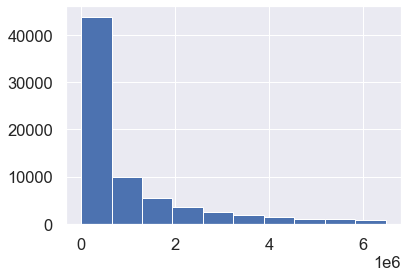

In [25]:
Q1 =  Data_final['Y_OPERATE1'].quantile(0.25)
Q3 = Data_final['Y_OPERATE1'] .quantile(0.75)
IQR = Q3 - Q1
IQR

## 用 Q1 - 1.5 * IQR,  Q3 + 1.5*IQR
Y_no_outliar = Data_final['Y_OPERATE1'][~((Data_final['Y_OPERATE1'] < (Q1 - 1.5 * IQR)) |(Data_final['Y_OPERATE1'] > (Q3 + 1.5 * IQR)))]

Y_no_outliar.describe()
plt.hist(Y_no_outliar)

idx_iqr = Y_no_outliar.index


# 納入模行資料筆數

In [ ]:
Data_M = Data_final
Data_M.shape


y_M = Data_M[y_col[0]]
X_M = Data_M.drop(columns=y_col)



In [29]:
corr_matrix = Data_M.corr()

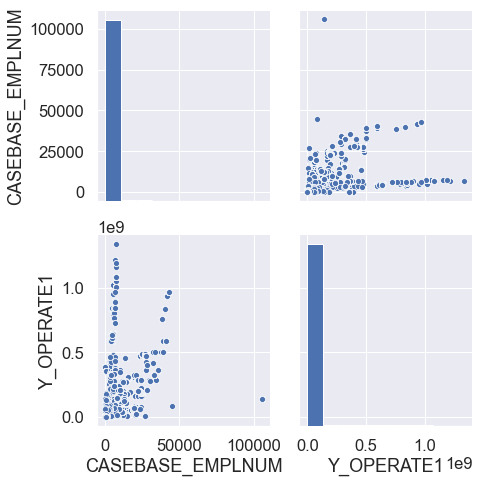

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
cols = corr_matrix[corr_matrix['Y_OPERATE1'].abs() > 0.6]['Y_OPERATE1'].index.to_list()
sns.pairplot(Data_final[cols], height=3.5)
plt.tight_layout()
plt.show()

<Figure size 1152x720 with 0 Axes>

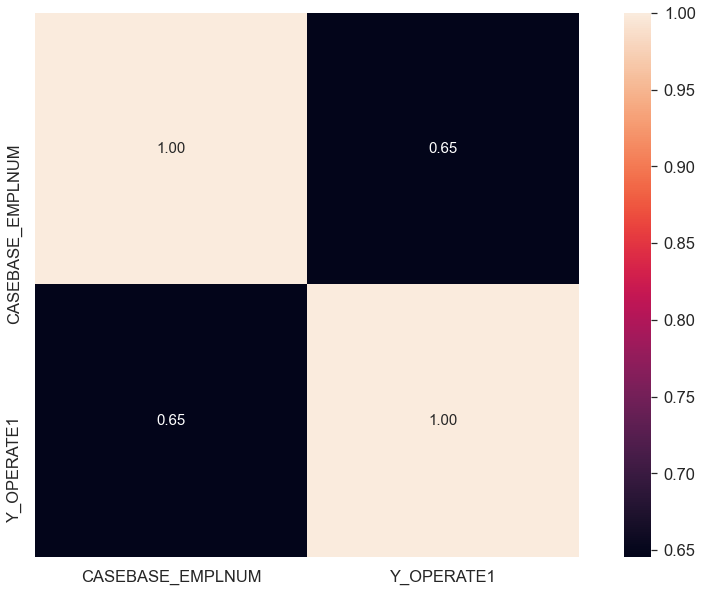

In [33]:
import numpy as np
cm = np.corrcoef(Data_final[cols].values.T)
plt.figure(figsize = (16,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)
plt.show()

# BY 年度的案件數目

In [34]:
X_date_count = pd.DataFrame(X_M.groupby('20'+X_M.index.get_level_values('CASE_ID').str[0:2]).size())


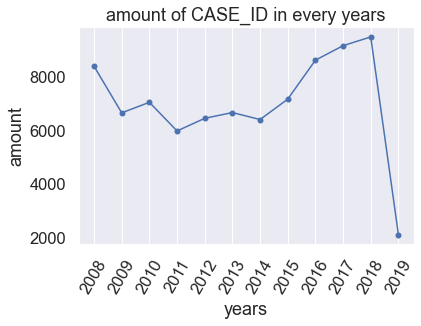

In [35]:
plt.ion()

plt.plot(X_date_count,'-o');
plt.xticks(rotation=60);
plt.title('amount of CASE_ID in every years');
plt.xlabel('years');
plt.ylabel('amount');
plt.grid(axis='y');
## 均勻挑
## 不需要考慮時間

# 變數重要性

(84178, 137)

In [70]:
categorical_columns = list(set(X_M.columns.to_list()) & set(col_object))

numerical_columns =  list(set(X_M.columns.to_list()) & set(col_numeric))

In [71]:
## 將中文轉換為數值標記

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from sklearn.preprocessing import LabelEncoder

cat_mappoing = dict()

for i in categorical_columns:
    
    if is_numeric_dtype(X_M[i]):
        continue
    elif is_string_dtype(X_M[i]):
        if sum(X_M[i].str.isnumeric()) > 1:
            continue
        else:
            pass
    else:
        pass
        
    
    label = LabelEncoder()
    X_M.loc[:,i] = label.fit_transform(X_M.loc[:,i])
    le_name_mapping = dict(zip(label.classes_, label.transform(label.classes_)))
    cat_mappoing.update({i:le_name_mapping})

cat_mappoing

{'CASEBASE_CCOMPTYPE': {'不詳': 0,
  '中型企業': 1,
  '中小型企業': 2,
  '大型企業': 3,
  '小型企業': 4,
  '超大型企業': 5},
 'CASEBASE5_FINANCEBUSNAME': {'一般批發零售業': 0,
  '一般投資業': 1,
  '不動產服務業': 2,
  '不動產業': 3,
  '不動產經紀業': 4,
  '乳品業': 5,
  '事務機器業': 6,
  '五金製品業': 7,
  '人纖紡織業': 8,
  '人纖製造業': 9,
  '休閒服務業': 10,
  '便利商店業': 11,
  '保全服務業': 12,
  '倉儲貨運業': 13,
  '倉儲運輸業': 14,
  '傳播媒體業': 15,
  '光學及精密器械業': 16,
  '光學器材業': 17,
  '光電材料、元件及成品業': 18,
  '光電材料及元件製造業': 19,
  '其他化學材料及化學製品業': 20,
  '其他專業技術服務業': 21,
  '其他工業製品業': 22,
  '其他服務業': 23,
  '其他機械業': 24,
  '其他燃料供應業': 25,
  '其他紡織及製品業': 26,
  '其他資訊服務業': 27,
  '其他金屬基本工業': 28,
  '其他金屬製品業': 29,
  '其他電力器材業': 30,
  '其他電子零組件業': 31,
  '其他電腦設備業': 32,
  '其他非金屬礦物製品業': 33,
  '其他食品業': 34,
  '冷凍食品業': 35,
  '出版及行銷業': 36,
  '出版業': 37,
  '出版行銷業': 38,
  '分期付款業': 39,
  '加油站業': 40,
  '化學品': 41,
  '化學材料及製品業': 42,
  '半導體業': 43,
  '印刷業': 44,
  '印刷電路板業': 45,
  '合成樹脂及塑膠業': 46,
  '合成橡膠業': 47,
  '基本化學工業': 48,
  '塑膠製品業': 49,
  '塗料、染料及顏料業': 50,
  '客運業': 51,
  '家用電器業': 52,
  '專業技術服務業': 53,
  '專用生產機業': 54

In [72]:
cat_list = {i:list(X_M[i].unique()) for i in categorical_columns}

In [73]:
## IV 規則
FS_IV, FS_IV_Table = FeaturesSelection_IV(X_M, y_M)
# FileName = 'FeaturesSelection_IV.csv'
# FS_IV_Table.to_csv(FileName, index = False)


# 開始跑模型

In [74]:
from Eric_utilites.Eric_Machinelearning import *

%run Eric_utilites/Eric_Machinelearning



In [75]:
### 這裡要 function 化 ###
# idx_train = X_M.index.get_level_values('CASE_ID').str[0:2] < test_year
# idx_test = X_M.index.get_level_values('CASE_ID').str[0:2] >= test_year



In [76]:
## ML 變數區
Model_summary = pd.DataFrame()
test_size = 0.2
col_stratify = ['CASE_Y','CASE_M']

metric = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']
kfold = 10



In [77]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


X_train, X_test, y_train, y_test = train_test_split(X_M, 
                                                    y_M, 
                                                    test_size=test_size, 
                                                    random_state=42, 
                                                    stratify=X_M[col_stratify])

y_mean = y_train.mean()
y_std = y_test.std()



len(X_M)
len(X_train)
len(X_test)
X_train.shape

84178

67342

16836

(67342, 135)

In [78]:
def f_PrePro(lr, categorical_columns, numerical_columns, cat_list,degree=1):
    from sklearn.impute import SimpleImputer
    from sklearn.inspection import permutation_importance
    from sklearn.compose import ColumnTransformer
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer
    
    from sklearn.preprocessing import PolynomialFeatures
    
    categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    
    ('onehot', OneHotEncoder(categories = cat_list,handle_unknown='ignore',sparse=False))
    ])
    
    numerical_pipe = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('standardize',StandardScaler())
    ])

    preprocessing = ColumnTransformer(
        [('cat', categorical_pipe,categorical_columns),
         ('num', numerical_pipe,numerical_columns)])

    clf = Pipeline([
        ('preprocess', preprocessing),
        ('poly',PolynomialFeatures(degree=degree,include_bias=False)),
        ('DecisionTreeRegressor', lr)
    ])
    return clf


def display_scores(scores):
    print("\nScores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std(),'\n')

In [79]:
## 按照時間均勻挑
## 產業別均勻挑
## 考慮可以「分層抽樣」的變數
## 根據真正有拿來建模的 DATA 的比例進行抽樣 train and test (hands-on chapter 2)



,fit_time,score_time,mean_squared_error,mean_absolute_error,r2
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,87.912306,0.528476,0.026120,0.026497,0.973016
std,0.359247,0.113226,0.005282,0.001230,0.008180
min,87.363927,0.331347,0.015322,0.024678,0.958978
25%,87.613053,0.481814,0.023348,0.025496,0.972143
50%,87.944779,0.495276,0.026204,0.026523,0.974071
75%,88.193706,0.623262,0.030070,0.027332,0.977845
max,88.443118,0.701701,0.033884,0.028529,0.982615


DecisionTreeRegressor_1
MSE train: 0.016, test: 0.020
MAE train: 0.019, test: 0.023
R^2 train: 0.984, test: 0.971


,Model,CV_MSE_mean,CV_MSE_std,CV_MAE_mean,CV_MAE_std,CV_r2_mean,CV_r2_std,MSE_train,MSE_test,MAE_train,MAE_test,R_square_train,R_square_test
0,DecisionTreeRegressor_1,0.02612,0.005282,0.026497,0.00123,0.973016,0.00818,0.015754,0.019678,0.019238,0.022964,0.984246,0.971226


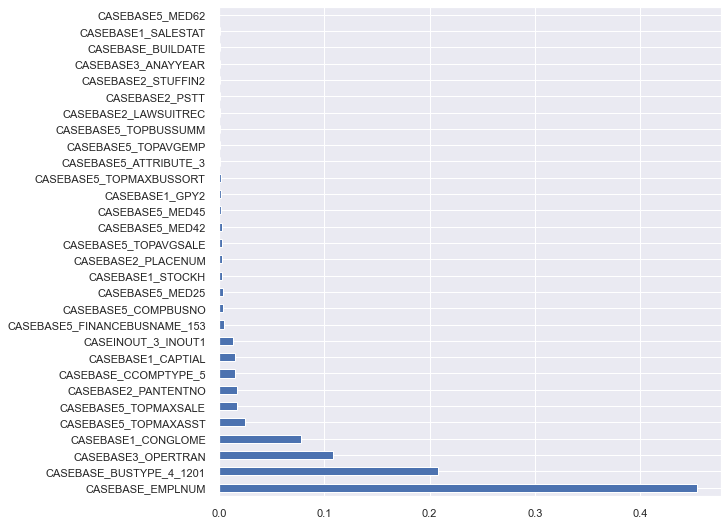

1

In [80]:
## DecisionTreeRegressor 決策樹回歸

from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
# col_y = ['Y_OPERATE1','CASEBASE1_GPY1']
# X = Data_final.drop(columns = col_y)
# y = Data_final[col_y[0]]

%run Eric_utilites/Eric_Machinelearning



dtr = f_PrePro(DecisionTreeRegressor(max_depth=40,min_samples_leaf=10 ),
               categorical_columns, 
               numerical_columns,
               list(cat_list.values()),
               1)

metric_dtr , dtr = f_ModelOutCome_agg('DecisionTreeRegressor_1', dtr, X_train, y_train, X_test, y_test, kfold, metric)

f_PlotFS(dtr, numerical_columns, categorical_columns)


Model_summary = Model_summary.append(metric_dtr)



In [67]:
## 線性迴歸分析
from sklearn.linear_model import LinearRegression

%run Eric_utilites/Eric_Machinelearning


lr = f_PrePro(LinearRegression(),
               categorical_columns, 
               numerical_columns,
               list(cat_list.values()),
               1)


metric_lr , lr = f_ModelOutCome_agg('LinearRegression_1', lr, X_train, y_train, X_test, y_test, kfold, metric)

# f_PlotFS(lr, numerical_columns, categorical_columns)


Model_summary = Model_summary.append(metric_lr)


,fit_time,score_time,mean_squared_error,mean_absolute_error,r2
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,42.717715,0.247120,59.556921,0.378709,-59.488516
std,1.616644,0.046337,187.280803,0.099161,190.223145
min,40.659209,0.205631,0.280139,0.340113,-600.873004
25%,41.553569,0.214501,0.300674,0.346539,0.685496
50%,42.698966,0.237176,0.306955,0.348075,0.696515
75%,43.741663,0.248203,0.310561,0.350106,0.706339
max,44.977521,0.356574,592.567369,0.660778,0.713805


LinearRegression_1
MSE train: 0.291, test: 0.301
MAE train: 0.341, test: 0.346
R^2 train: 0.709, test: 0.705


,Model,CV_MSE_mean,CV_MSE_50%,CV_MSE_std,CV_MAE_mean,CV_MAE_50%,CV_MAE_std,CV_r2_mean,CV_r2_50%,CV_r2_std,MSE_train,MSE_test,MAE_train,MAE_test,R_square_train,R_square_test
0,LinearRegression_1,59.556921,0.306955,187.280803,0.378709,0.348075,0.099161,-59.488516,0.696515,190.223145,0.291002,0.301006,0.341098,0.345906,0.708993,0.705266


,fit_time,score_time,mean_squared_error,mean_absolute_error,r2
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,64.943599,0.384632,0.100445,0.158252,0.899505
std,12.742561,0.071034,0.007511,0.003411,0.007406
min,40.305097,0.264658,0.091254,0.155025,0.885600
25%,69.453873,0.364773,0.095508,0.155970,0.895570
50%,71.132688,0.388480,0.097875,0.157748,0.902147
75%,71.274197,0.441067,0.103702,0.158143,0.904576
max,72.317875,0.473957,0.113213,0.164855,0.907335


ExtraTreesRegressor_1
MSE train: 0.052, test: 0.099
MAE train: 0.112, test: 0.156
R^2 train: 0.948, test: 0.903


,Model,CV_MSE_mean,CV_MSE_50%,CV_MSE_std,CV_MAE_mean,CV_MAE_50%,CV_MAE_std,CV_r2_mean,CV_r2_50%,CV_r2_std,MSE_train,MSE_test,MAE_train,MAE_test,R_square_train,R_square_test
0,ExtraTreesRegressor_1,0.100445,0.097875,0.007511,0.158252,0.157748,0.003411,0.899505,0.902147,0.007406,0.0523,0.099034,0.112152,0.156433,0.947699,0.903029


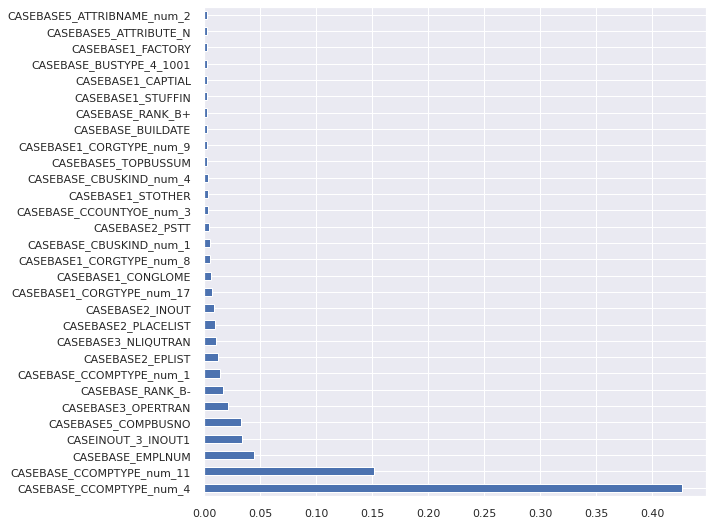

1

In [68]:
## 極限樹
from sklearn.ensemble import ExtraTreesRegressor 


for i in range(1,2):
    etr = f_PrePro(ExtraTreesRegressor(n_estimators = 10,max_depth = 40,min_samples_leaf =10,random_state=42,n_jobs=-1),
                   categorical_columns, 
                   numerical_columns,
                   list(cat_list.values()),
                   i)
    metric_etr , etr = f_ModelOutCome_agg('ExtraTreesRegressor_' + str(i), etr, X_train, y_train, X_test, y_test, kfold, metric)

    f_PlotFS(etr, numerical_columns, categorical_columns)


    Model_summary = Model_summary.append(metric_etr)
    

,fit_time,score_time,mean_squared_error,mean_absolute_error,r2
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,48.054417,0.352224,0.111939,0.166512,0.887992
std,5.109061,0.070908,0.004953,0.002464,0.005096
min,34.538063,0.265219,0.103363,0.161762,0.880084
25%,48.200387,0.292462,0.108869,0.165601,0.884357
50%,50.278670,0.343720,0.112386,0.166123,0.887645
75%,50.610415,0.407026,0.114561,0.168292,0.892160
max,50.918771,0.462202,0.118916,0.170089,0.896005


RandomForestRegressor_1
MSE train: 0.062, test: 0.113
MAE train: 0.120, test: 0.165
R^2 train: 0.938, test: 0.889


,Model,CV_MSE_mean,CV_MSE_50%,CV_MSE_std,CV_MAE_mean,CV_MAE_50%,CV_MAE_std,CV_r2_mean,CV_r2_50%,CV_r2_std,MSE_train,MSE_test,MAE_train,MAE_test,R_square_train,R_square_test
0,RandomForestRegressor_1,0.111939,0.112386,0.004953,0.166512,0.166123,0.002464,0.887992,0.887645,0.005096,0.062101,0.113391,0.12017,0.164783,0.937898,0.888972


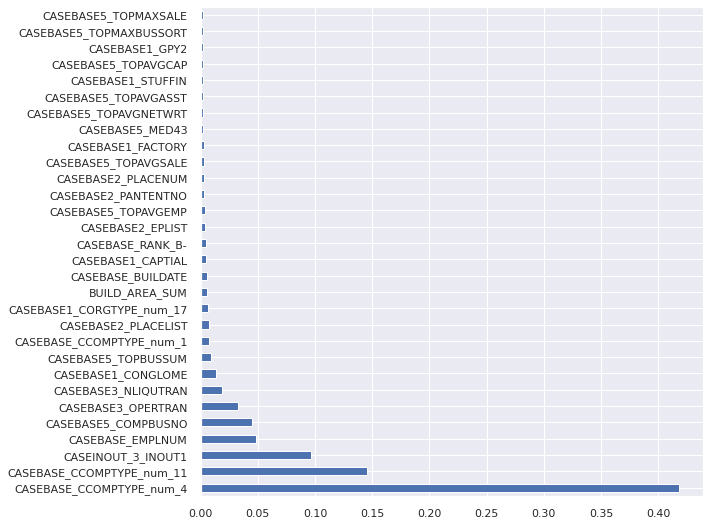

1

In [69]:
# 隨機森林

from sklearn.ensemble import RandomForestRegressor 


for i in range(1,2):
    rfr = f_PrePro(RandomForestRegressor(n_estimators = 10, max_depth = 40,min_samples_leaf =10,random_state=42,n_jobs=-1),
                   categorical_columns, 
                   numerical_columns,
                   list(cat_list.values()),
                   i)
    
    metric_rfr, rfr = f_ModelOutCome_agg('RandomForestRegressor_' + str(i), rfr, X_train, y_train, X_test, y_test, kfold, metric)

    f_PlotFS(rfr, numerical_columns, categorical_columns)


    Model_summary = Model_summary.append(metric_rfr)


In [ ]:
## LinearSVR

from sklearn.svm import SVR

for ker_i in ['linear']: #, 'poly', 'rbf', 'sigmoid', 'precomputed']:

    svr = SVR(kernel=ker_i, degree=2, C=100, epsilon=0.1)
    
    
    svr = f_PrePro(svr,
                   categorical_columns, 
                   numerical_columns,
                   list(cat_list.values()))
    
    
    metric_svr, svr = f_ModelOutCome_agg('SVR_' + ker_i, svr, X_train, y_train, X_test, y_test, kfold, metric)

    #f_PlotFS(svr, numerical_columns, categorical_columns)


    Model_summary = Model_summary.append(metric_svr)



In [ ]:
Model_summary

# Feature Selection

In [53]:
## 考慮重要參數
n = 10## 選取 IV method 前一百個變數
col_feature1 = FS_IV['index'][:n].to_list()

for i in range(1,3):
    categorical_columns_fs = list(set(categorical_columns) & set(col_feature1))
    numerical_columns_fs = list(set(numerical_columns) & set(col_feature1))
    
    cat_list_FS = [ cat_list[i] for i in categorical_columns_fs]
    
    X_train_FS = X_train[col_feature1]
    X_test_FS = X_test[col_feature1]
    
    ## linear 
    lr_fs = f_PrePro(LinearRegression(),
                   categorical_columns_fs, 
                   numerical_columns_fs,
                   cat_list_FS,
                   i)
    
    metric_lr_fs, lr_fs = f_ModelOutCome_agg('LinearRegression_FS_' + str(i), lr_fs, X_train_FS, y_train, X_test_FS, y_test, kfold, metric)
    Model_summary = Model_summary.append(metric_lr_fs)
    
    
    ## decision tree
    dtr_fs = f_PrePro(DecisionTreeRegressor(max_depth=40,min_samples_leaf=10 ),
                   categorical_columns_fs, 
                   categorical_columns_fs,
                   cat_list_FS,
                   i)
    
    metric_dtr_fs, dtr_fs = f_ModelOutCome_agg('DecisionTreeRegressor_FS_' + str(i), dtr_fs, X_train_FS, y_train, X_test_FS, y_test, kfold, metric)
    Model_summary = Model_summary.append(metric_dtr_fs)
    
    
    ## extra tree
    etr_fs = f_PrePro(ExtraTreesRegressor(n_estimators = 10, max_depth = 40,min_samples_leaf =10,random_state=42, n_jobs = -1),
                   categorical_columns_fs, 
                   numerical_columns_fs,
                   cat_list_FS,
                   i)
    
    metric_etr_fs, etr_fs = f_ModelOutCome_agg('ExtraTreeRegressor_FS_' + str(i), etr_fs, X_train_FS, y_train, X_test_FS, y_test, kfold, metric)
    Model_summary = Model_summary.append(metric_etr_fs)

    

NameError: name 'LinearRegression' is not defined

In [75]:

Model_summary.to_csv('no_fin.csv')



,Model,CV_MSE_mean,CV_MSE_50%,CV_MSE_std,CV_MAE_mean,CV_MAE_50%,CV_MAE_std,CV_r2_mean,CV_r2_50%,CV_r2_std,MSE_train,MSE_test,MAE_train,MAE_test,R_square_train,R_square_test
0,DecisionTreeRegressor_1,1.515173e-01,0.150513,8.834368e-03,0.187201,0.186447,0.004193,8.484382e-01,0.846844,7.926566e-03,0.062849,0.145623,0.118901,0.181159,0.937150,0.857412
0,LinearRegression_1,5.955692e+01,0.306955,1.872808e+02,0.378709,0.348075,0.099161,-5.948852e+01,0.696515,1.902231e+02,0.291002,0.301006,0.341098,0.345906,0.708993,0.705266
0,ExtraTreesRegressor_1,1.004449e-01,0.097875,7.510800e-03,0.158252,0.157748,0.003411,8.995054e-01,0.902147,7.405908e-03,0.052300,0.099034,0.112152,0.156433,0.947699,0.903029
0,RandomForestRegressor_1,1.119390e-01,0.112386,4.953366e-03,0.166512,0.166123,0.002464,8.879919e-01,0.887645,5.096040e-03,0.062101,0.113391,0.120170,0.164783,0.937898,0.888972
0,LinearRegression_1,7.292319e+01,0.347325,2.295156e+02,0.398333,0.364732,0.109140,-7.306323e+01,0.654711,2.331217e+02,0.333783,0.349944,0.358924,0.366785,0.666212,0.657349
0,DecisionTreeRegressor_1,3.333116e-01,0.334281,1.264978e-02,0.330040,0.330546,0.004772,6.666678e-01,0.665228,5.858710e-03,0.304935,0.340736,0.315429,0.333441,0.695060,0.666364
0,LinearRegression_1,7.292319e+01,0.347325,2.295156e+02,0.398333,0.364732,0.109140,-7.306323e+01,0.654711,2.331217e+02,0.333783,0.349944,0.358924,0.366785,0.666212,0.657349
0,DecisionTreeRegressor_1,3.331504e-01,0.334204,1.252322e-02,0.329994,0.330690,0.004744,6.668240e-01,0.665367,5.911475e-03,0.304935,0.341053,0.315429,0.333527,0.695060,0.666054
0,ExtraTreeRegressor_1,1.435881e-01,0.143268,7.480976e-03,0.196913,0.198005,0.004542,8.563082e-01,0.856823,7.908095e-03,0.104769,0.138570,0.169186,0.193226,0.895229,0.864317
0,LinearRegression_2,2.945275e+09,0.580889,9.313779e+09,227.167188,0.272302,717.508312,-2.991528e+09,0.417641,9.460042e+09,0.144272,0.360057,0.206017,0.263641,0.855725,0.647446


In [109]:
# ### 對 y 進行轉換
# # 線性迴歸分析


# from sklearn.linear_model import LinearRegression
# from sklearn.compose import TransformedTargetRegressor
# from sklearn.preprocessing import StandardScaler



# func = lambda x: np.log(abs(x+1)) * np.sign(x)
# inverse_func = lambda x : (np.exp(abs(x)) - 1) * np.sign(x)

# reg = TransformedTargetRegressor(regressor=LinearRegression(),
#                                  transformer= StandardScaler())
#                                  #func=func, inverse_func=inverse_func)

# lr = f_PrePro(reg,
#                categorical_columns, 
#                numerical_columns)

# ## Cross_val_score
# lin_scores = cross_val_score(lr, X_train, y_train,
#                              scoring="neg_mean_squared_error", cv=10)
# lin_rmse_scores = np.sqrt(-lin_scores)
# display_scores(lin_rmse_scores)

# lr = f_ModelOutcome(lr, X_train, y_train, X_test, y_test)


In [110]:
# ## LinearSVR
# from sklearn.svm import SVR

# reg_svr = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)

# lr = f_PrePro(reg_svr,
#               categorical_columns, 
#               numerical_columns)

# lr = f_ModelOutcome(lr, X_train, y_train, X_test, y_test)

In [70]:
# # Importing module and initializing setup
# from pycaret.regression import *

# clf1 = setup(data = Data_M, 
#              target = 'Y_OPERATE1',
#              normalize = True,
#              normalize_method='zscore',
#              feature_selection= True,
#              ignore_features = ['CASEBASE1_GPY1'],
#              categorical_features =['CASEBASE_BUSTYPE_4'] + [  i + '_num'for i in col_mapping.keys()],
#              numeric_features = [],
#              n_jobs=-1)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,3620
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(127747, 102)"
4,Missing Values,True
5,Numeric Features,64
6,Categorical Features,37
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [71]:
# best = compare_models()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Extreme Gradient Boosting,1871368.8927,225488321028611.3438,14429907.5449,0.9864,1.4375,6.1230,48.2562
1,CatBoost Regressor,2123738.7441,309072901896609.7500,15470326.1428,0.9807,1.6553,14.3230,41.5693
2,Extra Trees Regressor,1314825.4137,314630227579206.3750,15027873.2845,0.9792,0.9546,7.0556,4.2072
3,Random Forest,1775300.5379,495014995360431.8125,20980401.3944,0.9698,0.9296,12.5233,4.0270
4,Light Gradient Boosting Machine,2716270.4506,552478189028197.5625,22496032.3728,0.9680,1.5520,7.3680,2.0094
5,K Neighbors Regressor,2781538.3792,615678127875928.7500,23993002.9556,0.9674,1.2446,6.8961,4.1040
6,Gradient Boosting Regressor,4349520.2521,533920909811178.1875,21388937.0382,0.9646,2.1977,29.7916,33.6718
7,Decision Tree,1976295.3508,986608806327237.0000,27827396.1061,0.9324,0.8737,8.6944,3.1581
8,Lasso Least Angle Regression,19665264.5318,3444322411141877.0000,57849200.6469,0.8140,3.4247,179.3693,0.3090
9,Lasso Regression,20617184.0199,3478010695279940.5000,58061095.1846,0.8131,3.5340,246.3432,9.9695
